In [1]:
from matplotlib.ticker import MultipleLocator
import numpy as np
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
from IPython.display import display
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
%matplotlib inline 
from sklearnex import patch_sklearn
patch_sklearn()

plt.rcParams['figure.dpi'] = 400

plt.style.use('science')

def plot_feature_importance_comparison(models, X_test, y_test, colors=None,coefs = None):
    # Dictionary to store feature importance results
    fi_results = {}

    for model_name, model in models.items():
        fi = permutation_importance(model, X_test, y_test,n_jobs=-1, random_state=42)
        fi_results[model_name] = fi.importances_mean

    # Extract feature names
    feature_names = range(X_test.shape[1])

    # Create a DataFrame for feature importance results
    importance_df = pd.DataFrame(fi_results, index=feature_names)
    with plt.style.context('science'):
        # Plot grouped bar chart
        fig, ax = plt.subplots(figsize=(12, 4))
        plt.gca().xaxis.set_major_locator(MultipleLocator(50))  # Adjust the interval as needed

        bar_width = 0.1
        bar_positions = np.arange(len(feature_names))

        for i, (model, importance) in enumerate(importance_df.items()):
            color = colors[i] if colors is not None else None
            ax.bar(bar_positions + (i * bar_width), importance, width=bar_width, label=model, color=color)

        # Add labels, title, and legend
        ax.set_xticks(bar_positions + 1.5 * bar_width)
        ax.set_xticklabels(feature_names, rotation=45, ha='right')
        ax.set_xlabel('Features')
        ax.set_ylabel('Importance')
        ax.set_title('Feature Importance Comparison')
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.1,
                        box.width, box.height * 0.9])

        # Put a legend below current axis
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
                fancybox=True, shadow=True, ncol=5)
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.tight_layout()
        plt.show()
    return importance_df
def plot_feature_mean_squared_error(models, X, y, colors=None,cv = 5,random_state = 123):
    # Dictionary to store feature importance results
    
    kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)

    # Define a function to calculate RMSE
    def rmse(y_true, y_pred):
        return np.sqrt(mean_squared_error(y_true, y_pred))

    # Create a scorer using the RMSE function
    rmse_scorer = make_scorer(rmse, greater_is_better=False)

    mean_rmse = {}
    model_names = []
    for model_name,model in models.items():
        cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring=rmse_scorer)
        mean_rmse[model_name] = -np.mean(cross_val_scores)
        model_names.append(model_name)
    with plt.style.context('science'):
        # Plot grouped bar chart
        fig, ax = plt.subplots(figsize=(6, 2))
        bar_width = 0.1
        plt.barh(model_names, mean_rmse.values())
        plt.xlabel('Mean RMSE')
        plt.title('Mean RMSE for Different Models')
        plt.show()

C:\Users\versu\AppData\Local\Temp\ipykernel_20456\1095517916.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

mnist_train = pd.read_csv("./datasets/500person.csv")
y = mnist_train["Index"].copy().to_numpy()
X = mnist_train.drop(columns=["Index"]).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.shape)

(400, 3)

c:\Users\versu\anaconda3\envs\env\lib\site-packages\dython\nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
c:\Users\versu\anaconda3\envs\env\lib\site-packages\dython\nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


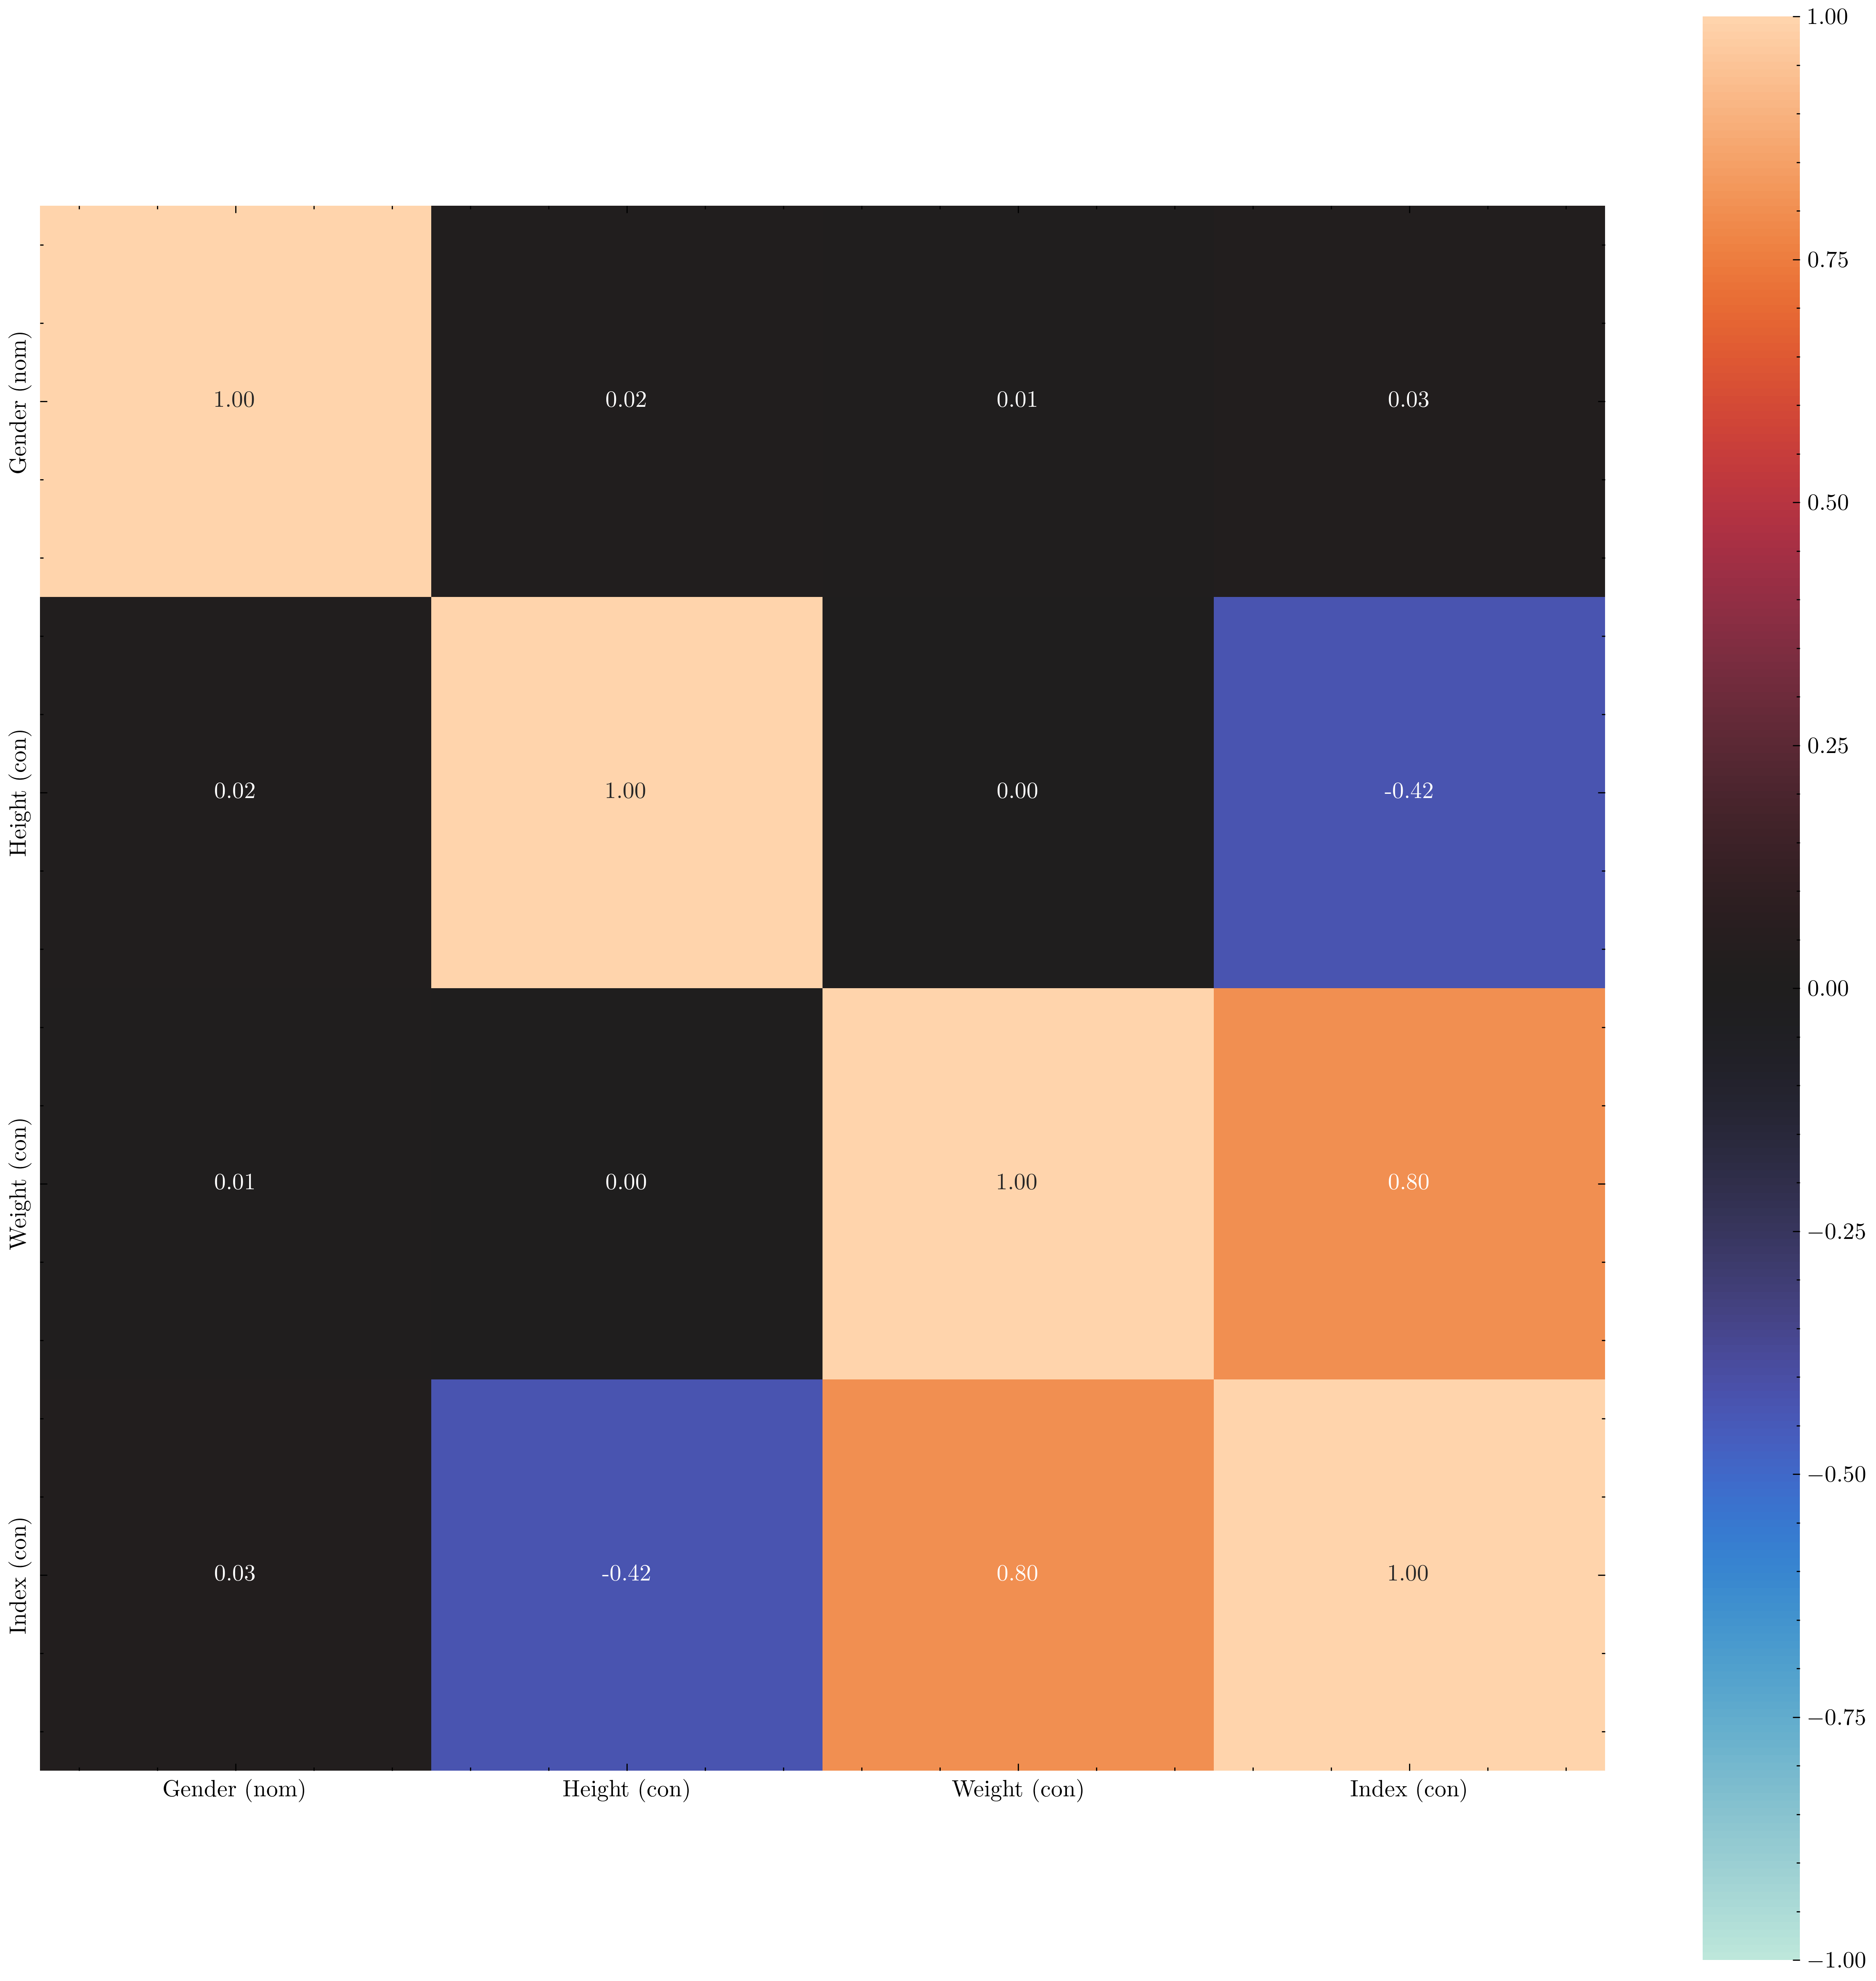

In [7]:
from dython.nominal import associations  # correlation calculation

correlation_matrix = associations(
    mnist_train, mark_columns=True, compute_only=False, figsize=(15, 15),annot=True)